# Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
from collections import Counter
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Removing (), - and , from column name
columns = train.columns
columns = columns.str.replace('[()]', '')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]', '')

train.columns = columns


<ipython-input-3-055b811056d7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]', '')
<ipython-input-3-055b811056d7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
<ipython-input-3-055b811056d7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]', '')


In [4]:
# Removing (), - and , from column name
columns = test.columns
columns = columns.str.replace('[()]', '')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]', '')

test.columns = columns

<ipython-input-4-a29f8161d458>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]', '')
<ipython-input-4-a29f8161d458>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
<ipython-input-4-a29f8161d458>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]', '')


## Data Partitioning

In [5]:
attributes = [col for col in train.columns if col != 'Activity']
attributes.pop()
X_train = train[attributes].values
X_test = test[attributes].values
y_train = train["Activity"]
y_test = test["Activity"]

## Classification
Accuracy, F1-score

In [48]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8605361384458772
F1-score [1.         0.80127524 0.83076923 0.86512524 0.8453106  0.80218579]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.84      0.77      0.80       491
          STANDING       0.80      0.86      0.83       532
           WALKING       0.83      0.91      0.87       496
WALKING_DOWNSTAIRS       0.87      0.83      0.85       420
  WALKING_UPSTAIRS       0.83      0.78      0.80       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



## Variance Threshold

In [6]:
from sklearn.feature_selection import VarianceThreshold

In [7]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(7352, 99)

In [51]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8072616219884629
F1-score [1.         0.72435897 0.76756757 0.79019608 0.80867347 0.73608247]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.76      0.69      0.72       491
          STANDING       0.74      0.80      0.77       532
           WALKING       0.77      0.81      0.79       496
WALKING_DOWNSTAIRS       0.87      0.75      0.81       420
  WALKING_UPSTAIRS       0.72      0.76      0.74       471

          accuracy                           0.81      2947
         macro avg       0.81      0.80      0.80      2947
      weighted avg       0.81      0.81      0.81      2947



## Univariate Feature Selection

In [52]:
from sklearn.feature_selection import SelectKBest

In [53]:
sel = SelectKBest(k=10)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(7352, 10)

In [54]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7044451985069562
F1-score [1.         0.58634538 0.60761905 0.6531401  0.66748466 0.68831169]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.58      0.59      0.59       491
          STANDING       0.62      0.60      0.61       532
           WALKING       0.63      0.68      0.65       496
WALKING_DOWNSTAIRS       0.69      0.65      0.67       420
  WALKING_UPSTAIRS       0.70      0.68      0.69       471

          accuracy                           0.70      2947
         macro avg       0.70      0.70      0.70      2947
      weighted avg       0.71      0.70      0.70      2947



## Recursive Feature Elimination

In [55]:
from sklearn.feature_selection import SelectFromModel


In [56]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(7352, 31)

In [57]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8489989820156091
F1-score [1.         0.77324974 0.80073462 0.87650882 0.84301607 0.77927928]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.79      0.75      0.77       491
          STANDING       0.78      0.82      0.80       532
           WALKING       0.81      0.95      0.88       496
WALKING_DOWNSTAIRS       0.88      0.81      0.84       420
  WALKING_UPSTAIRS       0.83      0.73      0.78       471

          accuracy                           0.85      2947
         macro avg       0.85      0.85      0.85      2947
      weighted avg       0.85      0.85      0.85      2947



## Principal Component Analysis

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [10]:
X_train_pca.shape

(7352, 2)

In [11]:
n_Activity= {"WALKING":1, "WALKING_UPSTAIRS":2,  "WALKING_DOWNSTAIRS":3, "SITTING":4, "STANDING":5, "LAYING":6}

In [12]:
map_activity = lambda s: n_Activity[s]
train["n_Activity"]= train["Activity"].apply(map_activity)
test["n_Activity"]= test["Activity"].apply(map_activity)

In [13]:
c_train = train['n_Activity']
c_train

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: n_Activity, Length: 7352, dtype: int64

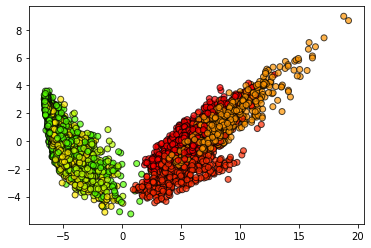

In [14]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [37]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.897 (0.010)


In [38]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5161180861893451
F1-score [0.47628267 0.33229491 0.47111111 0.65391015 0.44925575 0.69951923]
                    precision    recall  f1-score   support

            LAYING       0.50      0.46      0.48       537
           SITTING       0.34      0.33      0.33       491
          STANDING       0.45      0.50      0.47       532
           WALKING       0.56      0.79      0.65       496
WALKING_DOWNSTAIRS       0.52      0.40      0.45       420
  WALKING_UPSTAIRS       0.81      0.62      0.70       471

          accuracy                           0.52      2947
         macro avg       0.53      0.51      0.51      2947
      weighted avg       0.52      0.52      0.51      2947



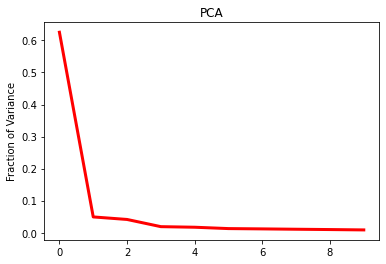

In [39]:
plt.plot(PCA(n_components=10).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

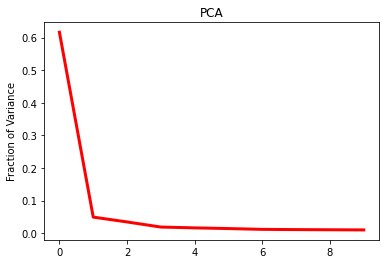

In [40]:
plt.plot(PCA(n_components=10).fit(X_test).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

## Random Subspace Projection

In [22]:
from sklearn import random_projection

In [23]:
rsp = random_projection.GaussianRandomProjection(n_components=2)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(7352, 2)

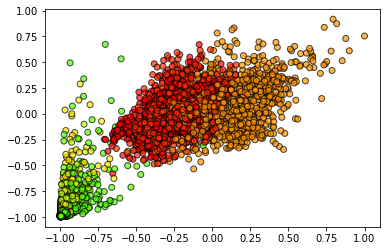

In [28]:
plt.scatter(X_train_sel[:, 0], X_train_sel[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

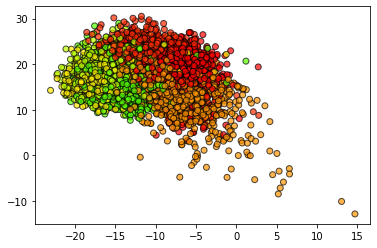

In [29]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [31]:
import sys
from time import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.datasets import load_digits
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils.fixes import parse_version

# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version("2.1"):
    density_param = {"density": True}
else:
    density_param = {"normed": True}

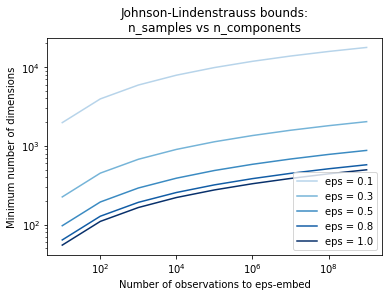

In [32]:
# range of admissible distortions
eps_range = np.linspace(0.1, 0.99, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))

# range of number of samples (observation) to embed
n_samples_range = np.logspace(1, 9, 9)

plt.figure()
for eps, color in zip(eps_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(n_samples_range, eps=eps)
    plt.loglog(n_samples_range, min_n_components, color=color)

plt.legend(["eps = %0.1f" % eps for eps in eps_range], loc="lower right")
plt.xlabel("Number of observations to eps-embed")
plt.ylabel("Minimum number of dimensions")
plt.title("Johnson-Lindenstrauss bounds:\nn_samples vs n_components")
plt.show()


Embedding 7352 samples with dim 561 using various random projections
Projected 7352 samples from 561 to 300 in 0.079s
Random matrix with size: 0.086MB
Mean distances rate: 1.02 (0.07)


C:\Users\Jenni\anaconda3\lib\site-packages\sklearn\random_projection.py:372: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (561 < 1000).The dimensionality of the problem will not be reduced.
  warnings.warn(


Projected 7352 samples from 561 to 1000 in 16.371s
Random matrix with size: 0.283MB
Mean distances rate: 0.97 (0.05)


C:\Users\Jenni\anaconda3\lib\site-packages\sklearn\random_projection.py:372: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (561 < 10000).The dimensionality of the problem will not be reduced.
  warnings.warn(


Projected 7352 samples from 561 to 10000 in 1.379s
Random matrix with size: 2.836MB
Mean distances rate: 1.00 (0.01)


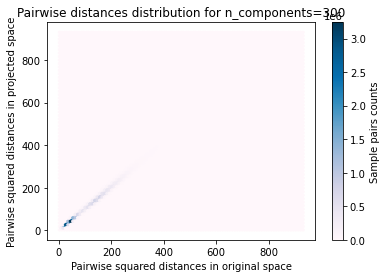

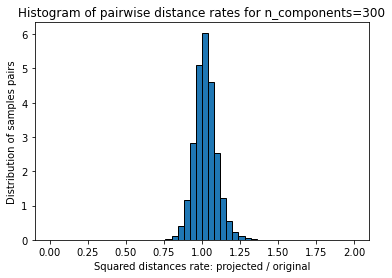

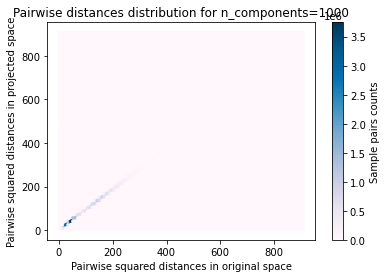

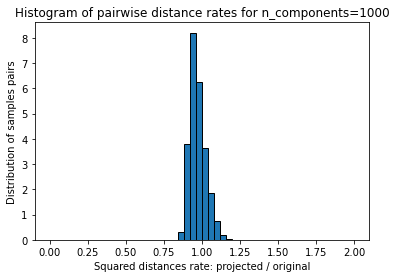

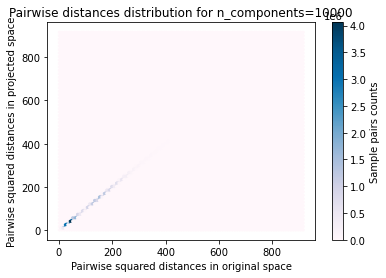

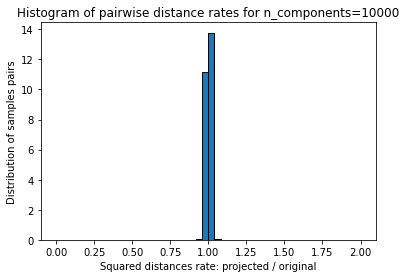

In [36]:
n_samples, n_features = X_train.shape
print(
    "Embedding %d samples with dim %d using various random projections"
    % (n_samples, n_features)
)

n_components_range = np.array([300, 1000, 10000])
dists = euclidean_distances(X_train, squared=True).ravel()

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]

for n_components in n_components_range:
    t0 = time()
    rp = SparseRandomProjection(n_components=n_components)
    projected_data = rp.fit_transform(X_train)
    print(
        "Projected %d samples from %d to %d in %0.3fs"
        % (n_samples, n_features, n_components, time() - t0)
    )
    if hasattr(rp, "components_"):
        n_bytes = rp.components_.data.nbytes
        n_bytes += rp.components_.indices.nbytes
        print("Random matrix with size: %0.3fMB" % (n_bytes / 1e6))

    projected_dists = euclidean_distances(projected_data, squared=True).ravel()[nonzero]

    plt.figure()
    min_dist = min(projected_dists.min(), dists.min())
    max_dist = max(projected_dists.max(), dists.max())
    plt.hexbin(
        dists,
        projected_dists,
        gridsize=100,
        cmap=plt.cm.PuBu,
        extent=[min_dist, max_dist, min_dist, max_dist],
    )
    plt.xlabel("Pairwise squared distances in original space")
    plt.ylabel("Pairwise squared distances in projected space")
    plt.title("Pairwise distances distribution for n_components=%d" % n_components)
    cb = plt.colorbar()
    cb.set_label("Sample pairs counts")

    rates = projected_dists / dists
    print("Mean distances rate: %0.2f (%0.2f)" % (np.mean(rates), np.std(rates)))

    plt.figure()
    plt.hist(rates, bins=50, range=(0.0, 2.0), edgecolor="k", **density_param)
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" % n_components)

    # TODO: compute the expected value of eps and add them to the previous plot
    # as vertical lines / region

plt.show()

In [135]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3664743807261622
F1-score [0.43392857 0.32371134 0.36763237 0.40297122 0.32338308 0.32321041]
                    precision    recall  f1-score   support

            LAYING       0.42      0.45      0.43       537
           SITTING       0.33      0.32      0.32       491
          STANDING       0.39      0.35      0.37       532
           WALKING       0.37      0.44      0.40       496
WALKING_DOWNSTAIRS       0.34      0.31      0.32       420
  WALKING_UPSTAIRS       0.33      0.32      0.32       471

          accuracy                           0.37      2947
         macro avg       0.36      0.36      0.36      2947
      weighted avg       0.37      0.37      0.36      2947



## Multi Dimensional Scaling

In [41]:
from sklearn.manifold import MDS

In [44]:
mds = MDS(n_components=6)
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

KeyboardInterrupt: 

In [ ]:
embedding = MDS(n_components=6)
X_transformed = embedding.fit_transform(X_train[:100])
X_transformed.shape

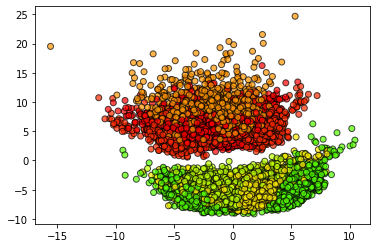

In [138]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [139]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.8686071817192601
F1-score [0.94166958 0.85659362 0.87083489 0.8441508  0.84460506 0.83244293]
                    precision    recall  f1-score   support

            LAYING       0.93      0.96      0.94      1407
           SITTING       0.85      0.87      0.86      1286
          STANDING       0.90      0.85      0.87      1374
           WALKING       0.81      0.89      0.84      1226
WALKING_DOWNSTAIRS       0.86      0.83      0.84       986
  WALKING_UPSTAIRS       0.87      0.80      0.83      1073

          accuracy                           0.87      7352
         macro avg       0.87      0.86      0.87      7352
      weighted avg       0.87      0.87      0.87      7352



## IsoMap

In [140]:
from sklearn.manifold import Isomap

In [141]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape

(7352, 2)

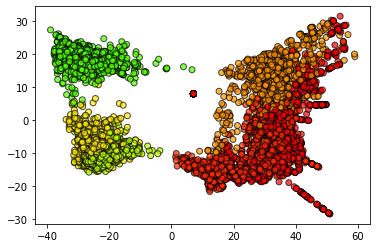

In [192]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [143]:
X_test_iso = mds.fit_transform(X_test) # non ha transform come funzione

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_iso, y_train)

y_pred = clf.predict(X_test_iso)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.042416016287750255
F1-score [0.07854985 0.06567164 0.         0.         0.11813187 0.00130976]
                    precision    recall  f1-score   support

            LAYING       0.21      0.05      0.08       537
           SITTING       0.05      0.11      0.07       491
          STANDING       0.00      0.00      0.00       532
           WALKING       0.00      0.00      0.00       496
WALKING_DOWNSTAIRS       0.14      0.10      0.12       420
  WALKING_UPSTAIRS       0.00      0.00      0.00       471

          accuracy                           0.04      2947
         macro avg       0.07      0.04      0.04      2947
      weighted avg       0.07      0.04      0.04      2947



In [54]:
import pandas as pd

from scipy import misc
from sklearn import manifold

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

import os

# Look pretty...
plt.style.use('ggplot')

In [46]:
iso = manifold.Isomap(n_neighbors=6, n_components=3)
iso.fit(X_train)

my_isomap = iso.transform(X_train)

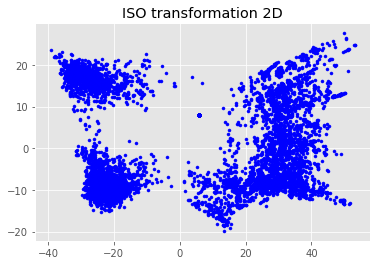

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("ISO transformation 2D")

ax.scatter(my_isomap[:,0], my_isomap[:,1], marker='.', c= "b")

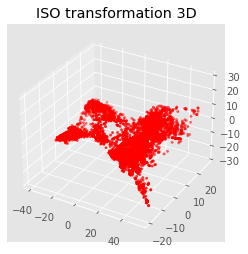

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("ISO transformation 3D")

ax.scatter(my_isomap[:,0], my_isomap[:,1], my_isomap[:,2], marker='.', c="r")

plt.show()

## t-SNE

In [144]:
from sklearn.manifold import TSNE

In [145]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

(7352, 2)

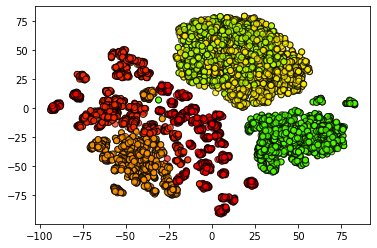

In [151]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [147]:
X_test_tsne = TSNE(verbose=2, perplexity=2).fit_transform(X_test)
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_test_tsne)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 2947 samples in 0.002s...
[t-SNE] Computed neighbors for 2947 samples in 0.250s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2947
[t-SNE] Computed conditional probabilities for sample 2000 / 2947
[t-SNE] Computed conditional probabilities for sample 2947 / 2947
[t-SNE] Mean sigma: 0.682869
[t-SNE] Computed conditional probabilities in 0.016s
[t-SNE] Iteration 50: error = 113.8628311, gradient norm = 0.1052713 (50 iterations in 1.022s)
[t-SNE] Iteration 100: error = 96.4538269, gradient norm = 0.0978277 (50 iterations in 0.734s)
[t-SNE] Iteration 150: error = 90.5770798, gradient norm = 0.0773196 (50 iterations in 0.639s)
[t-SNE] Iteration 200: error = 87.3435516, gradient norm = 0.0720791 (50 iterations in 0.613s)
[t-SNE] Iteration 250: error = 85.1922836, gradient norm = 0.0672492 (50 iterations in 0.602s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.192284
[t-SNE] Iteration 300: erro

In [148]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.427s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.641824
[t-SNE] Computed conditional probabilities in 0.026s
[t-SNE] Iteration 50: error = 124.6875153, gradient norm = 0.0261746 (50 iterations in 2.734s)
[t-SNE] Iteration 100: error = 106.8325882, gradient norm = 0.0298390 (50 iterations in 

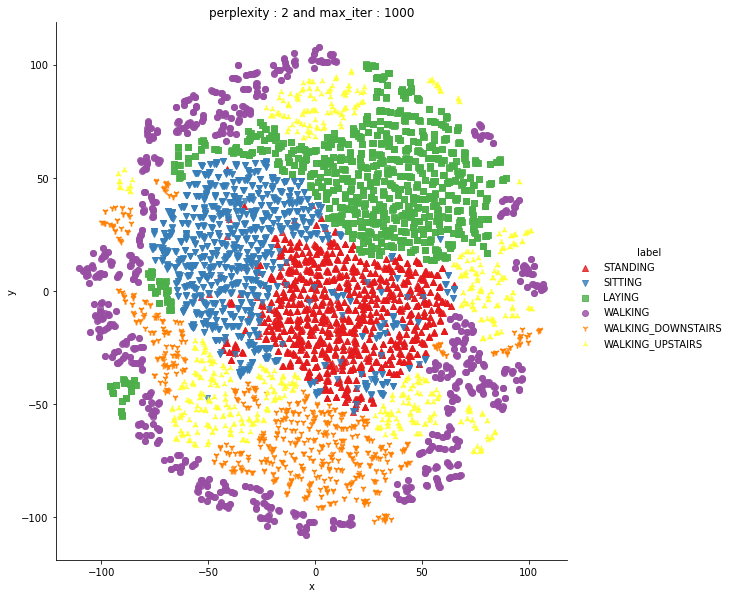

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.377s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.973508
[t-SNE] Computed conditional probabilities in 0.044s
[t-SNE] Iteration 50: error = 113.8875427, gradient norm = 0.0272933 (50 iterations in 2.244s)
[t-SNE] Iteration 100: error = 96.7494202, gradient norm = 0.0160182 (50 iteration

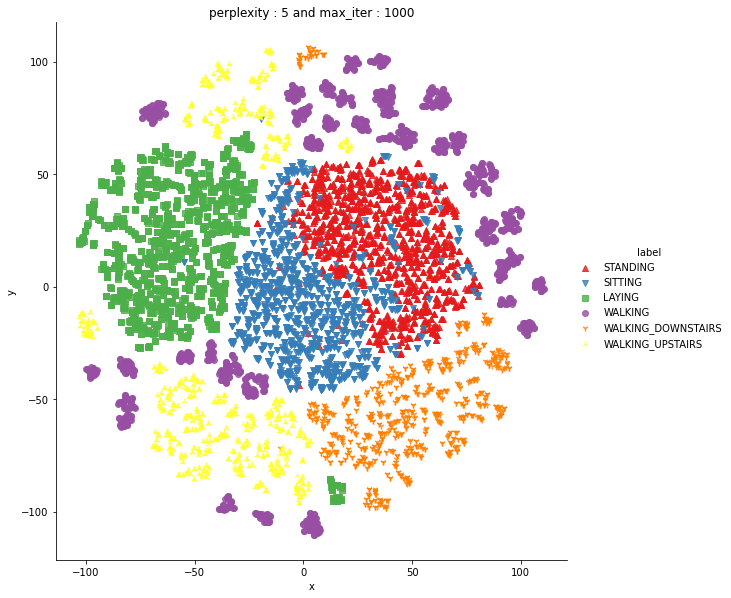

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.148052
[t-SNE] Computed conditional probabilities in 0.086s
[t-SNE] Iteration 50: error = 105.3734665, gradient norm = 0.0223717 (50 iterations in 2.501s)
[t-SNE] Iteration 100: error = 89.7881699, gradient norm = 0.0107736 (50 iteratio

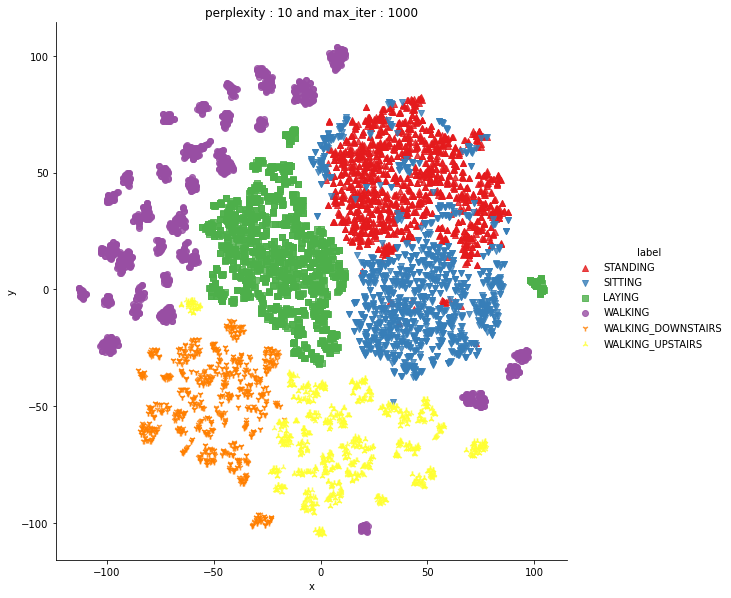

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 1.367s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.291282
[t-SNE] Computed conditional probabilities in 0.170s
[t-SNE] Iteration 50: error = 96.6504440, gradient norm = 0.0292354 (50 iterations in 2.563s)
[t-SNE] Iteration 100: error = 82.8856201, gradient norm = 0.0064668 (50 iteration

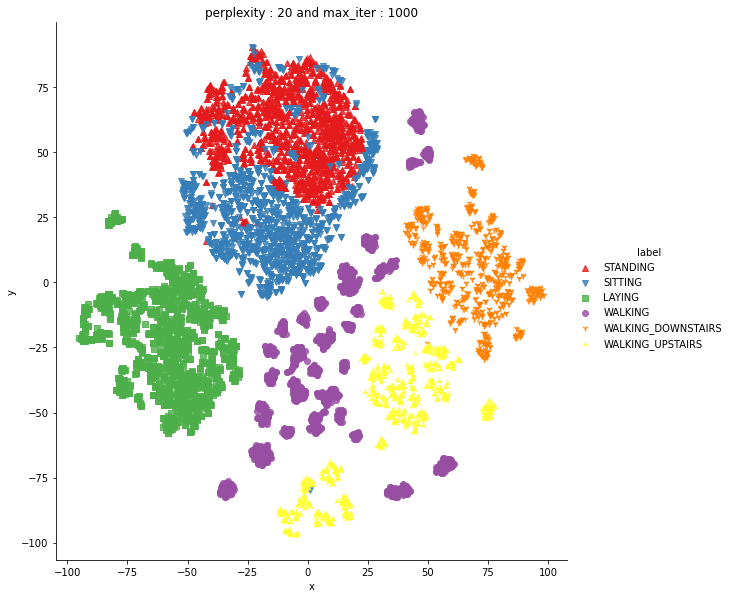

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 1.419s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.459017
[t-SNE] Computed conditional probabilities in 0.431s
[t-SNE] Iteration 50: error = 86.3710861, gradient norm = 0.0247165 (50 iterations in 3.059s)
[t-SNE] Iteration 100: error = 74.9508057, gradient norm = 0.0052792 (50 iteratio

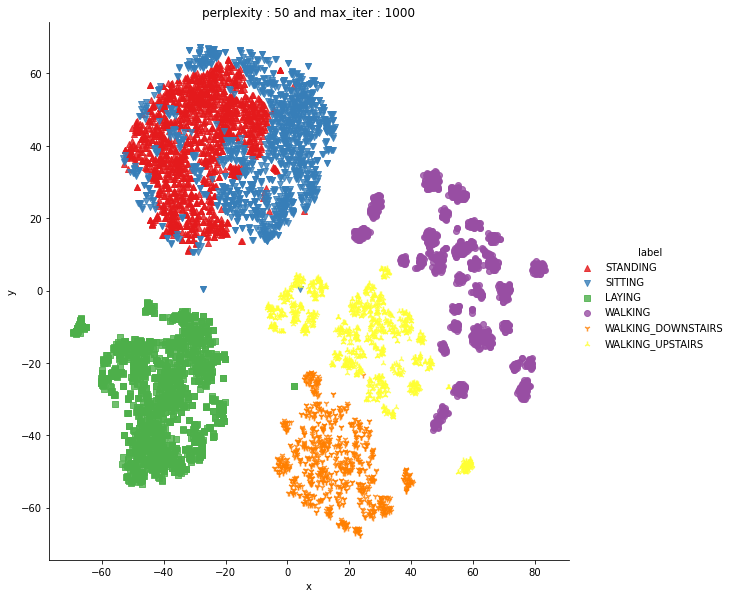

Done


In [150]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])


# Anomaly detection

### DBSCAN

In [152]:
from sklearn.cluster import DBSCAN

In [156]:
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan.fit(X_train)

DBSCAN(eps=5, min_samples=10)

In [157]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0], dtype=int64), array([ 185, 7167], dtype=int64))

In [159]:
train


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,n_Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS,2
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS,2
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS,2
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS,2


In [162]:
train.loc[np.where(dbscan.labels_==-1)]

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,n_Activity
31,-0.041701,0.175102,0.025552,-0.758393,-0.586537,-0.439110,-0.774118,-0.555350,-0.438736,-0.737152,...,0.114760,0.114436,-0.070782,-0.001461,-0.552939,-0.053539,-0.260424,1,SITTING,4
64,0.019016,-0.007037,-0.028333,-0.661294,-0.713353,-0.701155,-0.693948,-0.706558,-0.755422,-0.891284,...,0.033488,0.061568,-0.514438,0.240943,0.205759,-0.536104,-0.360736,1,LAYING,6
66,-0.166426,-0.119353,0.133035,-0.633135,-0.189775,-0.319336,-0.623804,-0.199675,-0.281088,-0.925208,...,0.139475,0.039216,-0.495303,0.082696,0.272083,-0.534122,-0.397428,1,LAYING,6
67,-0.239103,-0.096904,0.148035,-0.637325,-0.127692,-0.258924,-0.643642,-0.138551,-0.239634,-0.878149,...,0.002418,-0.002366,-0.101878,0.543207,0.378792,-0.488443,-0.487057,1,LAYING,6
69,0.303833,0.103648,-0.245331,-0.755994,-0.642571,-0.695501,-0.767537,-0.709978,-0.730464,-0.717081,...,-0.116769,-0.391404,0.413596,0.051020,0.494535,-0.465940,-0.535802,1,LAYING,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,-0.107514,-0.134927,0.719094,-0.842120,-0.775504,-0.085829,-0.838150,-0.803260,0.064459,-0.945330,...,0.025515,0.330502,0.108466,0.143716,0.453108,-0.817722,-0.148173,25,LAYING,6
5574,0.042405,-0.036058,-0.066380,-0.607342,-0.818148,-0.949817,-0.640824,-0.838315,-0.960224,-0.873514,...,-0.046342,0.220005,-0.179243,0.397882,0.699062,-0.599049,-0.395422,26,LAYING,6
6516,0.407075,0.072753,-0.122333,-0.931431,-0.808446,-0.901322,-0.929975,-0.818070,-0.902026,-0.835543,...,0.138355,-0.240282,-0.576182,0.783965,0.790490,0.251841,0.945795,28,LAYING,6
6535,0.143105,0.020477,-0.181751,-0.792843,-0.512246,-0.587244,-0.843663,-0.472478,-0.602030,-0.803513,...,0.222368,-0.366016,-0.219877,0.050104,0.465025,-0.284737,-0.718141,28,LAYING,6


## LOF

In [163]:
from sklearn.neighbors import LocalOutlierFactor

In [165]:
clf = LocalOutlierFactor(n_neighbors=2)
outliers = clf.fit_predict(X_train)

In [166]:
clf.negative_outlier_factor_

array([-1.2018778 , -1.09940879, -1.06928095, ..., -1.0096179 ,
       -1.0392275 , -1.01309373])

In [167]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  10, 7342], dtype=int64))

In [168]:
np.where(outliers==-1)

(array([ 564,  934, 1904, 2299, 2871, 3792, 4281, 4744, 5066, 5644],
       dtype=int64),)

In [169]:
clf.negative_outlier_factor_[np.where(outliers==-1)]

array([-1.68879422, -1.51155723, -2.07939183, -1.50987958, -1.50232814,
       -1.50041778, -1.51977402, -1.52681153, -1.58829941, -1.55628319])

In [170]:
max_val = np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])
max_val

-1.5004177819273359

In [171]:
np.min(clf.negative_outlier_factor_[np.where(outliers==-1)])

-2.0793918258933335

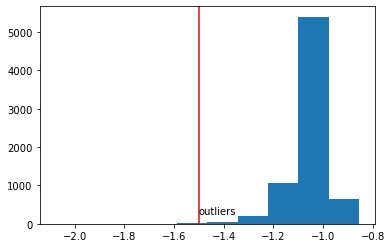

In [172]:
plt.hist(clf.negative_outlier_factor_, bins=10)
plt.axvline(max_val, c='r')
plt.text(max_val, 250, 'outliers')
plt.show()

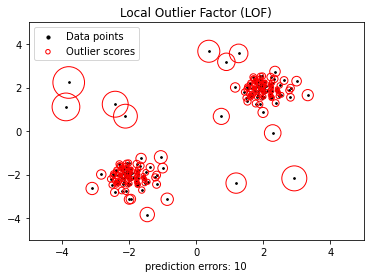

In [174]:
#EXAMPLE PROF
np.random.seed(50)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [175]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [179]:
clf = IsolationForest(random_state=0)
clf.fit(X_train)

IsolationForest(random_state=0)

In [180]:
outliers = clf.predict(X_test)

In [181]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 164, 2783], dtype=int64))

# Imbalanced learning



In [1]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.8605361384458772
F1-score [1.         0.80127524 0.83076923 0.86512524 0.8453106  0.80218579]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.84      0.77      0.80       491
          STANDING       0.80      0.86      0.83       532
           WALKING       0.83      0.91      0.87       496
WALKING_DOWNSTAIRS       0.87      0.83      0.85       420
  WALKING_UPSTAIRS       0.83      0.78      0.80       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



## ROC curve

In [39]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [40]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1],pos_label='your_label')
roc_auc0 = auc(fpr0, tpr0)

C:\Users\Jenni\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


## Adjust the Decision Threshold

## PCA

In [65]:
from sklearn.decomposition import PCA

### Logistic Regression with Grid Search

In [28]:
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [40]:
import itertools

In [41]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [42]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))


    #  number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))


In [43]:
from sklearn import linear_model
from sklearn import metrics

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done....!

==> training time:- 0:00:10.054340

Predicting test data
Done....!

==> testing time:- 0:00:00.005978

==> Accuracy:- 0.9589412962334578


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 430  58   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 405  11]
 [  0   0   0  24   1 446]]


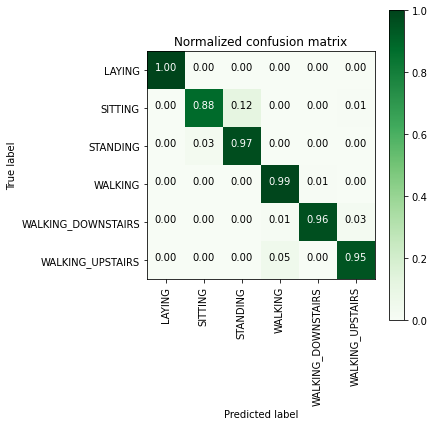

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	LogisticRegression(C=1)


==> Best parameters:
	Parameters of best estimator : {'C': 1, 'penalty': 'l2'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9368895661079609


In [46]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

### Decision Trees with GridSearchCV

training the model..
Done....!

==> training time:- 0:00:15.443421

Predicting test data
Done....!

==> testing time:- 0:00:00.005972

==> Accuracy:- 0.8683406854428232


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 373 118   0   0   0]
 [  0  62 470   0   0   0]
 [  0   0   0 472  17   7]
 [  0   0   0  29 346  45]
 [  0   0   0  70  40 361]]


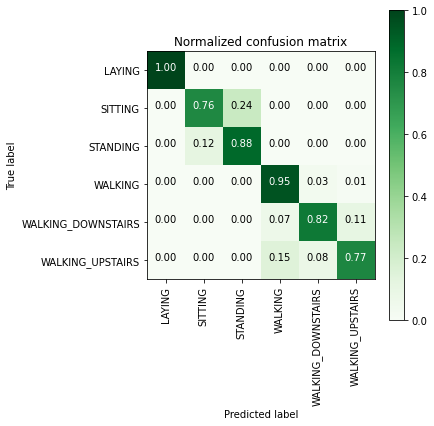

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.76      0.81       491
          STANDING       0.80      0.88      0.84       532
           WALKING       0.83      0.95      0.88       496
WALKING_DOWNSTAIRS       0.86      0.82      0.84       420
  WALKING_UPSTAIRS       0.87      0.77      0.82       471

          accuracy                           0.87      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.87      0.87      2947



==> Best Estimator:
	DecisionTreeClassifier(max_depth=9)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 9}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.8510704458533922


In [47]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(dt_grid_results['model'])

### Random Forest Classifier with GridSearch

training the model..
Done....!

==> training time:- 0:07:44.916755

Predicting test data
Done....!

==> testing time:- 0:00:00.077186

==> Accuracy:- 0.9212758737699356


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 437  54   0   0   0]
 [  0  45 487   0   0   0]
 [  0   0   0 480   7   9]
 [  0   0   0  23 352  45]
 [  0   0   0  43   6 422]]


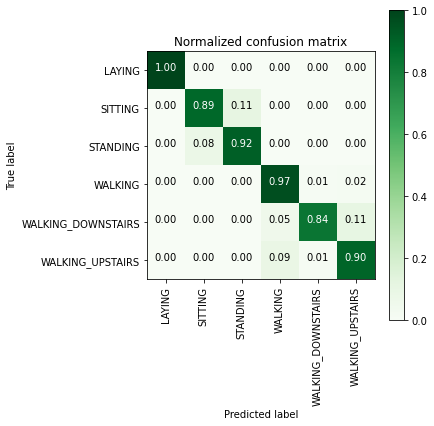

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.88      0.97      0.92       496
WALKING_DOWNSTAIRS       0.96      0.84      0.90       420
  WALKING_UPSTAIRS       0.89      0.90      0.89       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



==> Best Estimator:
	RandomForestClassifier(max_depth=11, n_estimators=190)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 11, 'n_estimators': 190}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9205698377243487


In [48]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rfc_grid_results['model'])

### Gradient Boosted Decision Trees With GridSearch

In [50]:
param_grid = {'max_depth': np.arange(5),'n_estimators':np.arange(140)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(gbdt_grid_results['model'])

training the model..


KeyboardInterrupt: 

#### Comparing all models

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_gri